# EDSA - Climate Change Belief Analysis 2022

# Predict an individual’s belief in climate change based on historical tweet data

Importing Libraries

In [1]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
# set plot style
sns.set()

Time to import our given data

In [2]:
df_train = pd.read_csv('train.csv')    #Importing the given train data

In [3]:
df_train.head() # Checking the first five rows to understand the structure of the data

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_test = pd.read_csv('test_with_no_labels.csv') #The given test data

In [5]:
df_test.head()  # Checking the first five rows to understand the structure of the data

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


From the above, it is clear that the data needs some cleaning. Before then, let us examine the submission sample data provided.

In [8]:
sample = pd.read_csv('sample_submission.csv') # The sample data for submission as well

In [9]:
sample.head() # Checking to know what it looks like

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


# Lets clean the train and test data

In [10]:
df_train.shape #Checking the train data size - Number of rows and columns

(15819, 3)

In [11]:
df_test.shape  #Checking the test data size - Number of rows and columns

(10546, 2)

We will re-arrange the columns of the train data to allign properly with that of the test data.

In [12]:
df_sentiment = df_train['sentiment']

In [14]:
df_train = df_train.drop(['sentiment'], axis = 1)

In [15]:
df_train['sentiment'] = df_sentiment

In [16]:
df_train.head() #Checking to see the result of the re-arrangement

,message,tweetid,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,It's not like we lack evidence of anthropogeni...,126103,1
2,RT @RawStory: Researchers say we have three ye...,698562,2
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1


In [17]:
df_train.isnull().sum() #checking for null values in the train data

message      0
tweetid      0
sentiment    0
dtype: int64

In [18]:
df_test.isnull().sum() #checking for null values in the test data

message    0
tweetid    0
dtype: int64

In [19]:
df_train.info() #Checking the data types for each column in the train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    15819 non-null  object
 1   tweetid    15819 non-null  int64 
 2   sentiment  15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [20]:
df_test.info() #Checking the data types for each column in the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Merging both train and test data to ease data cleaning of both data sets.

In [21]:
merged_data = pd.concat([df_train, df_test]) #merging the data
merged_data.head() #checking the first five rows of the merged data

,message,tweetid,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,625221,1.0
1,It's not like we lack evidence of anthropogeni...,126103,1.0
2,RT @RawStory: Researchers say we have three ye...,698562,2.0
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1.0
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1.0


In [22]:
merged_data.tail()  #checking the last five rows of the merged data

,message,tweetid,sentiment
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,NaN
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,NaN
10545,RT @chloebalaoing: climate change is a global ...,470892,NaN


In [23]:
merged_data.info() #checking the data types in the merged data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 0 to 10545
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   message    26365 non-null  object 
 1   tweetid    26365 non-null  int64  
 2   sentiment  15819 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 823.9+ KB


In [24]:
merged_data.isnull().sum() #null values of 10,546 is okay due to the number of rows in the merged test data

message          0
tweetid          0
sentiment    10546
dtype: int64

In [25]:
type_sentiment = list(df_train.sentiment.unique())
print(type_sentiment) #viewing the number of sentiment types in our train data

[1, 2, 0, -1]


In [26]:
df_train['sentiment'].value_counts() #The distribution of the number of observations for the sentiments is vital as well

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

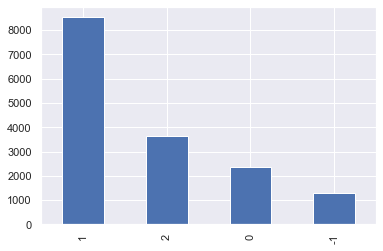

In [27]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show() #Plotting the bar chart for a clearer view

Sentiment 1 is seen to have more collected observations and -1 has the least number of observations

In [28]:
print(list(merged_data.head().message)) #checking the kind of dirt present in our data

["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable", "It's not like we lack evidence of anthropogenic global warming", 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…', '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD', "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"]


From the above, we have observed some dirt which include Punctuations, Stopwords and  Web urls. The removal will take turns as we prob more into the data

Let us start with web urls

In [29]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
merged_data['message'] = merged_data['message'].replace(to_replace = pattern_url, value = subs_url, regex = True) #replacing web urls

In [29]:
print(list(merged_data.head().message)) #Lets see how well that went

["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable", "It's not like we lack evidence of anthropogenic global warming", 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late url-web url-web…', '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change url-web', "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"]


Pretty good I think

In [31]:
merged_data['message'] = merged_data['message'].str.lower() #Converting all text from upper to lower case - another form of dirt cleaning

In [32]:
print(list(merged_data.head().message)) #Checking to see how well it went

["polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable", "it's not like we lack evidence of anthropogenic global warming", 'rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…', '#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web', "rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"]


We will now remove Punctuations

In [33]:
import string #importing the required library

In [34]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation]) #A function to assist with the task

In [35]:
merged_data['message'] = merged_data['message'].apply(remove_punctuation) #Applyng the function for desired results

In [36]:
print(list(merged_data.head().message)) #Checking the results

['polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable', 'its not like we lack evidence of anthropogenic global warming', 'rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…', 'todayinmaker wired  2016 was a pivotal year in the war on climate change urlweb', 'rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight']


We intend to hold back on the removal of stop words for now. Their combination with other words may be useful

Applying tokenisation to the 'message' column of the data

In [37]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer #importing the reqiured library

In [38]:
nltk.download(['punkt','stopwords']) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
tokeniser = TreebankWordTokenizer()
merged_data['tokens'] = merged_data['message'].apply(tokeniser.tokenize) # Tokenizing

In [40]:
merged_data['tokens'].iloc[10000] #checking the result of tokenization done

['the',
 'washington',
 'post',
 'lies',
 'nonstop',
 'like',
 'this',
 'as',
 'trump',
 'halts',
 'fed',
 'action',
 'on',
 'climate',
 'change',
 'cities',
 'amp',
 'states',
 'push',
 'on',
 'urlweb']

In [ ]:
Let us Stemmatize the data at this juncture

In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [49]:
stem = PorterStemmer()

In [42]:
def df_stemmer(words, Stemmer):
    return [stemmer.stem(word) for word in words]

In [64]:
merged_data['stem'] = merged_data['tokens'].apply(stem.stem) #(word), arg=word for word in merged_data['tokens'])

AttributeError: 'list' object has no attribute 'lower'

In [62]:
stem.stem('multiply')

'multipli'

In [36]:
from nltk.corpus import stopwords
print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '